In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
%matplotlib inline
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report


In [131]:
%conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.11.0               |   py39h6e9494a_0        16.9 MB  conda-forge
    libxgboost-1.5.1           |   cpu_h598c753_2         2.2 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py39hb0a6171_2         152 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.1              |cpu_py39h037b50c_2          12 KB  conda-forge
    ------------------------------------------------------------
          

In [156]:
%conda install -c conda-forge imbalanced-learn


Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1



imbalanced-learn-0.7 | 97 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [157]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [25]:
df = pd.read_csv('online_shoppers_intention.csv')

In [26]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [29]:
df.shape

(12330, 18)

In [30]:
df.isnull().sum() #no missing value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [31]:
df['Revenue'] = df['Revenue'].astype(int) #clean data type: bool to int

In [32]:
df['Weekend'] = df['Weekend'].astype(int) #clean data type: bool to int

In [188]:
df

Administrative  Administrative_Duration  Informational  \
BounceRates                                                           
0.200000                  0                      0.0              0   
0.000000                  0                      0.0              0   
0.200000                  0                      0.0              0   
0.050000                  0                      0.0              0   
0.020000                  0                      0.0              0   
...                     ...                      ...            ...   
0.007143                  3                    145.0              0   
0.000000                  0                      0.0              0   
0.083333                  0                      0.0              0   
0.000000                  4                     75.0              0   
0.000000                  0                      0.0              0   

             Informational_Duration  ProductRelated  ProductRelated_Duration  \
BounceRates                                                                    
0.200000                        0.0               1                 0.000000   
0.000000                        0.0               2                64.000000   
0.200000                        0.0               1                 0.000000   
0.050000                        0.0               2                 2.666667   
0.020000                        0.0              10               627.500000   
...                             ...             ...                      ...   
0.007143                        0.0              53              1783.791667   
0.000000                        0.0               5               465.750000   
0.083333                        0.0               6               184.250000   
0.000000                        0.0              15               346.000000   
0.000000                        0.0               3                21.250000   

             ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
BounceRates                                                               
0.200000      0.200000    0.000000         0.0      2                 1   
0.000000      0.100000    0.000000         0.0      2                 2   
0.200000      0.200000    0.000000         0.0      2                 4   
0.050000      0.140000    0.000000         0.0      2                 3   
0.020000      0.050000    0.000000         0.0      2                 3   
...                ...         ...         ...    ...               ...   
0.007143      0.029031   12.241717         0.0     12                 4   
0.000000      0.021333    0.000000         0.0     11                 3   
0.083333      0.086667    0.000000         0.0     11                 3   
0.000000      0.021053    0.000000         0.0     11                 2   
0.000000      0.066667    0.000000         0.0     11                 3   

             Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
BounceRates                                                               
0.200000           1       1            1            2        0        0  
0.000000           2       1            2            2        0        0  
0.200000           1       9            3            2        0        0  
0.050000           2       2            4            2        0        0  
0.020000           3       1            4            2        1        0  
...              ...     ...          ...          ...      ...      ...  
0.007143           6       1            1            2        1        0  
0.000000           2       1            8            2        1        0  
0.083333           2       1           13            2        1        0  
0.000000           2       3           11            2        0        0  
0.000000           2       1            2            1        1        0  

[10467 rows x 17 columns]

In [33]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [34]:
month = {'Feb':2, 'Mar':3,'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['Month'] = df['Month'].map(month)

In [35]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [36]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [37]:
df['ProductRelated_Duration'].value_counts()

0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64

<AxesSubplot:>

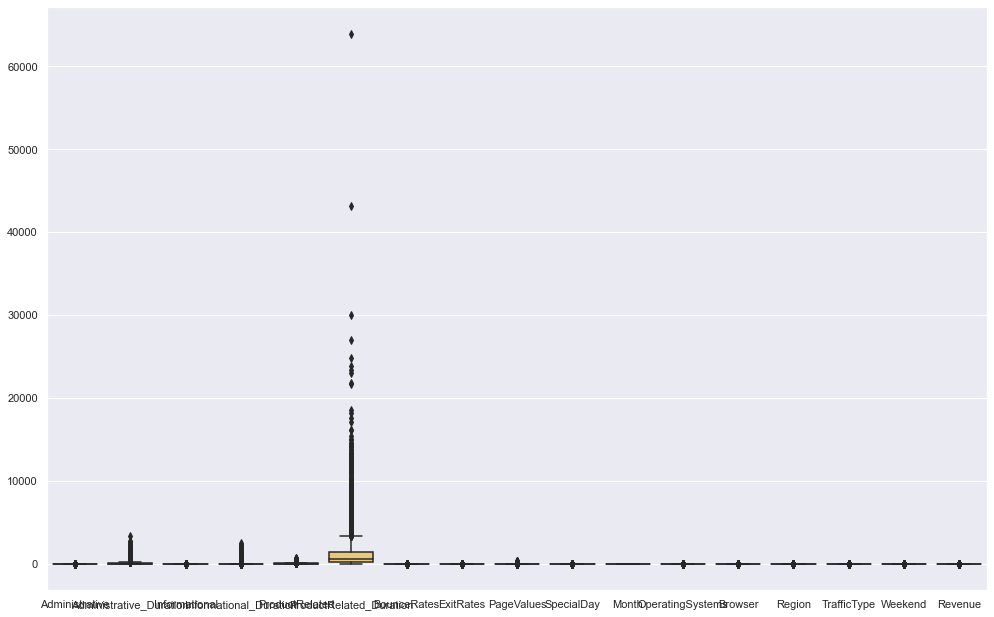

In [92]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=df, palette="YlOrBr")

def find_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

n = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']
for c in n:
    print(c, len(find_outliers(df[c])[0]))

def find_outliers_sd(x):
    sd = x.std()*3
    mean = x.mean()
    ceiling = mean+sd
    outlier_indices = list(x.index[x>ceiling])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

n = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'PageValues']
for c in n:
    print(c, len(find_outliers_sd(df[c])[0]))

def mod_outlier(df): 
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

In [39]:
df.groupby('Revenue')['PageValues'].value_counts()

Revenue  PageValues
0        0.000000      9230
         26.545500        2
         0.038035         1
         0.129677         1
         0.150650         1
                       ... 
1        261.491286       1
         270.784693       1
         287.953793       1
         360.953384       1
         361.763742       1
Name: PageValues, Length: 2710, dtype: int64

In [86]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [40]:
df.groupby('PageValues').Revenue.agg(['min', 'max','median','mean'])

min  max  median      mean
PageValues                            
0.000000      0    1     0.0  0.038542
0.038035      0    0     0.0  0.000000
0.067050      1    1     1.0  1.000000
0.093547      1    1     1.0  1.000000
0.098621      1    1     1.0  1.000000
...         ...  ...     ...       ...
261.491286    1    1     1.0  1.000000
270.784693    1    1     1.0  1.000000
287.953793    1    1     1.0  1.000000
360.953384    1    1     1.0  1.000000
361.763742    1    1     1.0  1.000000

[2704 rows x 4 columns]

/var/folders/3x/hv82rdys42jgvw56vmzh0f_c0000gn/T/ipykernel_51121/2480748429.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



BounceRates
0.000000    AxesSubplot(0.08,0.07;0.87x0.81)
0.000027    AxesSubplot(0.08,0.07;0.87x0.81)
0.000034    AxesSubplot(0.08,0.07;0.87x0.81)
0.000038    AxesSubplot(0.08,0.07;0.87x0.81)
0.000039    AxesSubplot(0.08,0.07;0.87x0.81)
                          ...               
0.175000    AxesSubplot(0.08,0.07;0.87x0.81)
0.176923    AxesSubplot(0.08,0.07;0.87x0.81)
0.180000    AxesSubplot(0.08,0.07;0.87x0.81)
0.183333    AxesSubplot(0.08,0.07;0.87x0.81)
0.200000    AxesSubplot(0.08,0.07;0.87x0.81)
Length: 1872, dtype: object

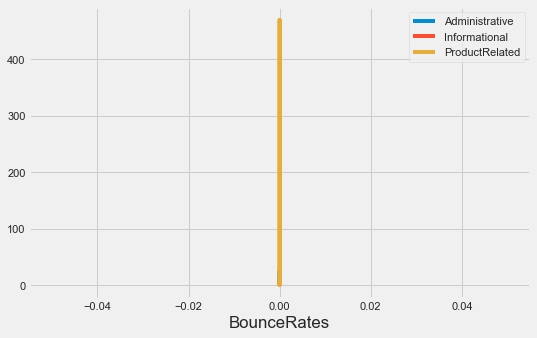

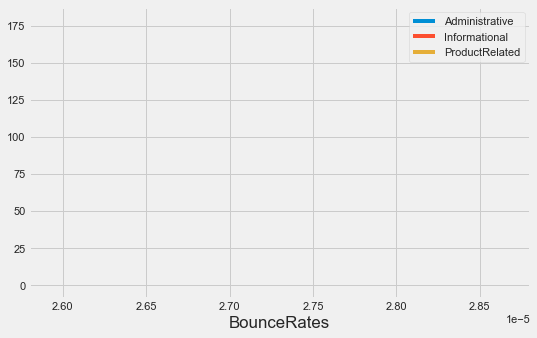

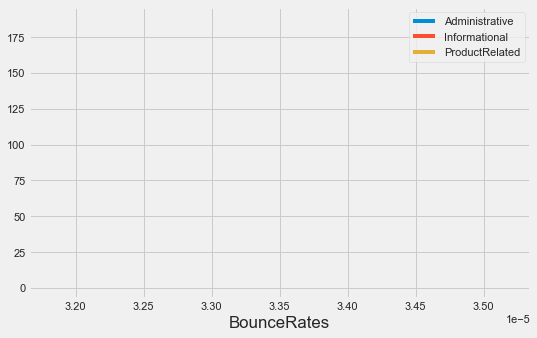

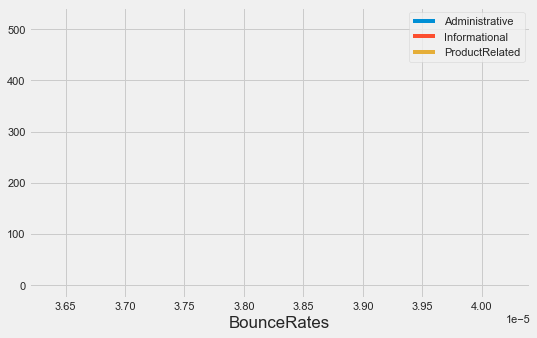

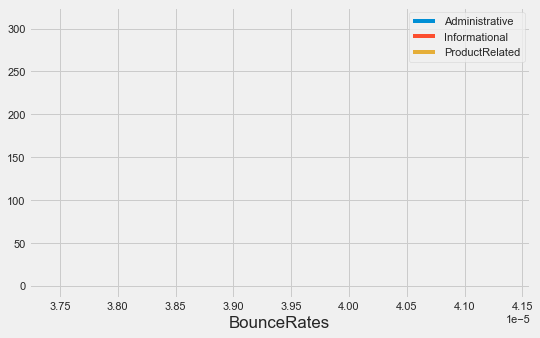

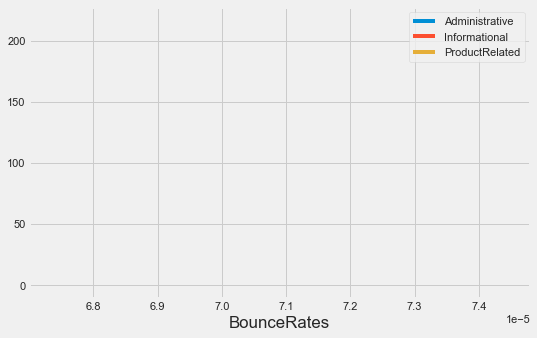

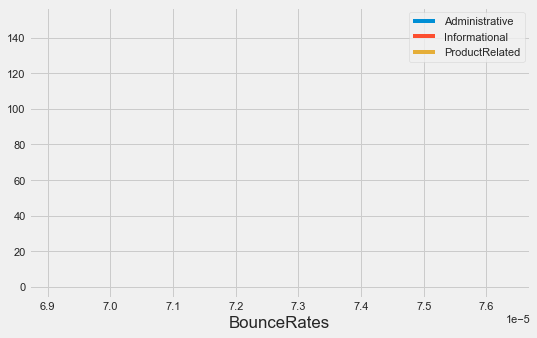

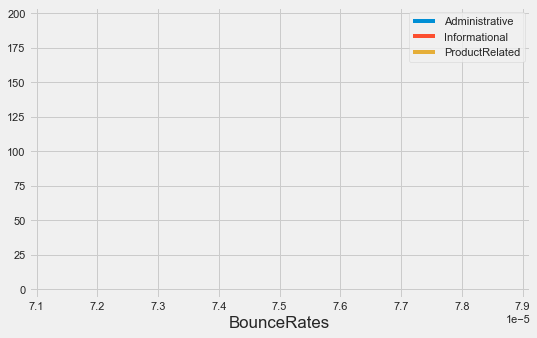

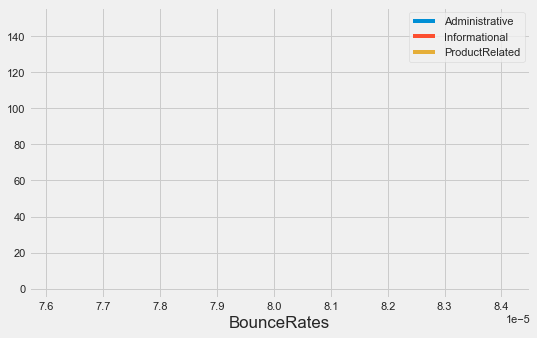

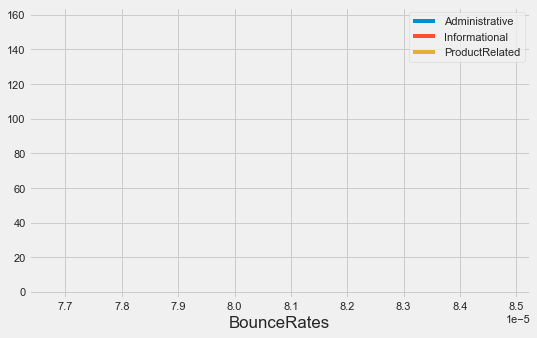

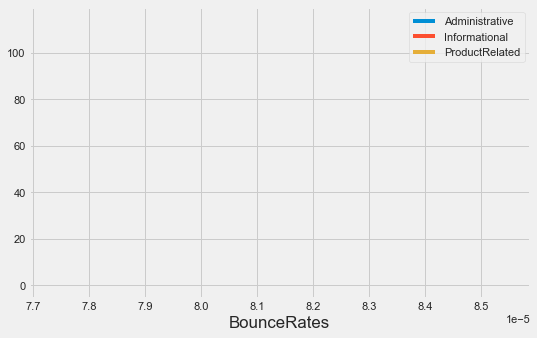

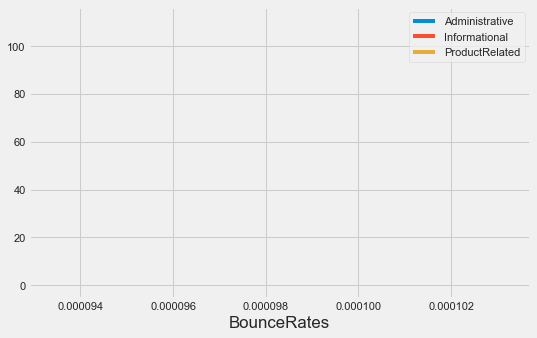

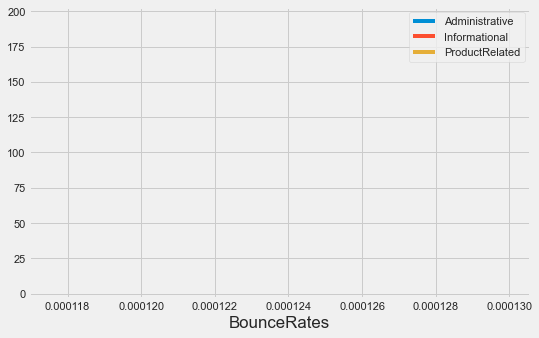

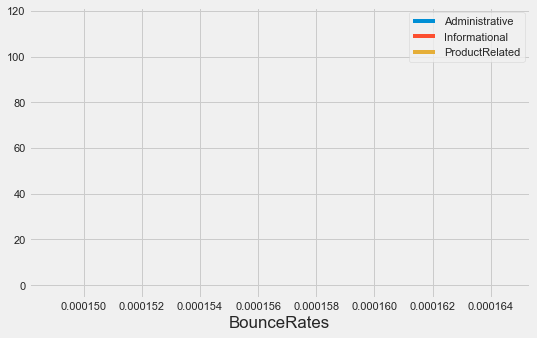

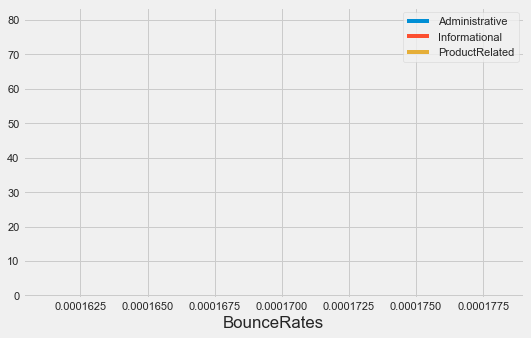

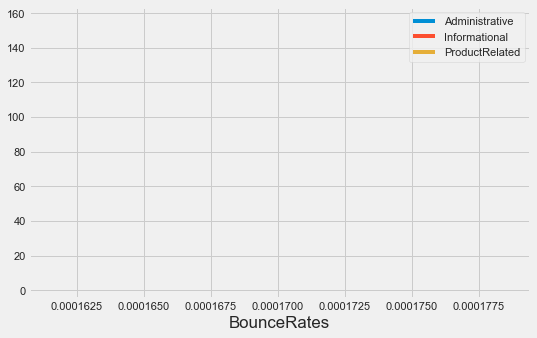

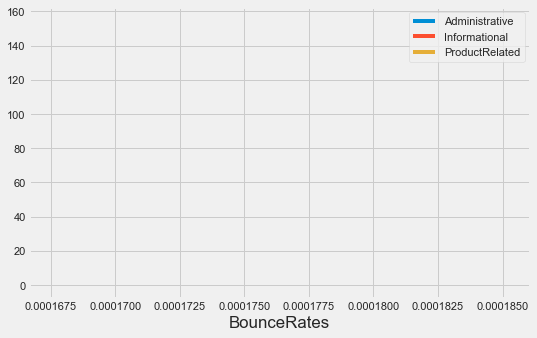

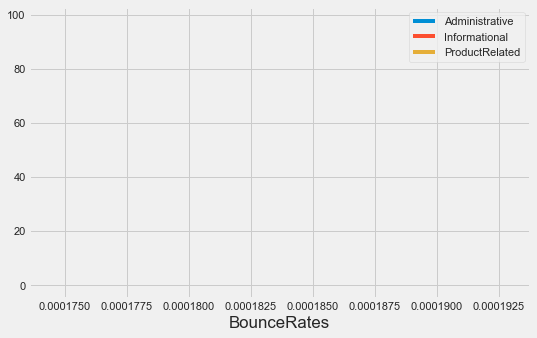

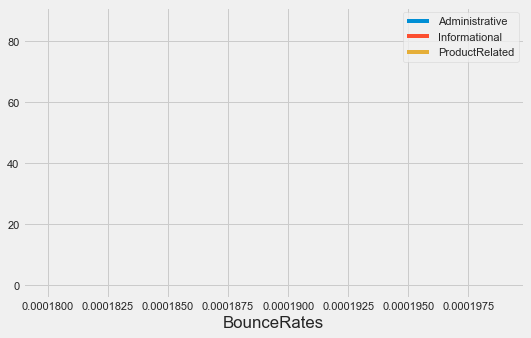

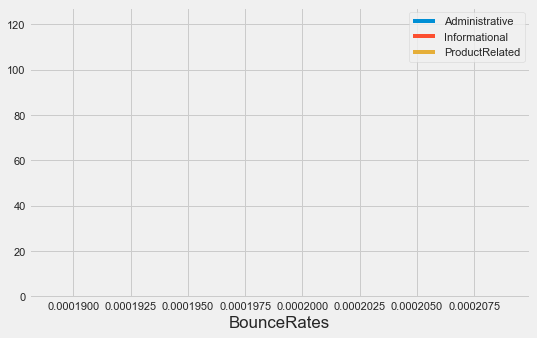

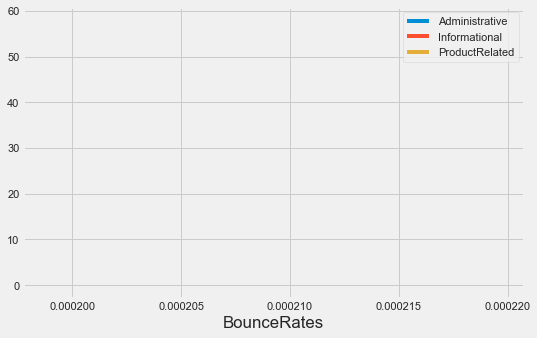

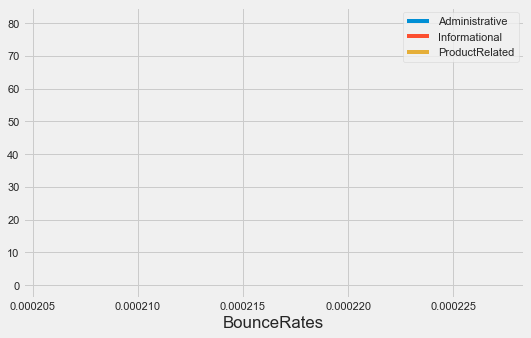

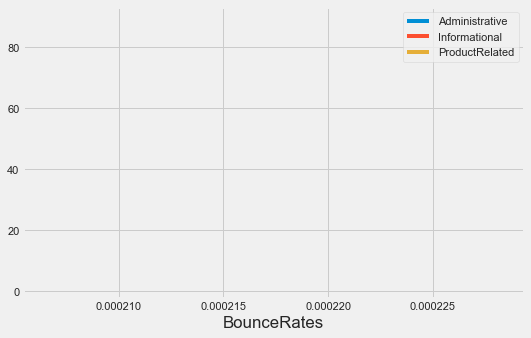

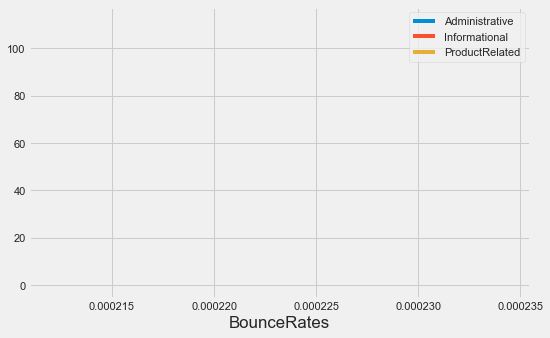

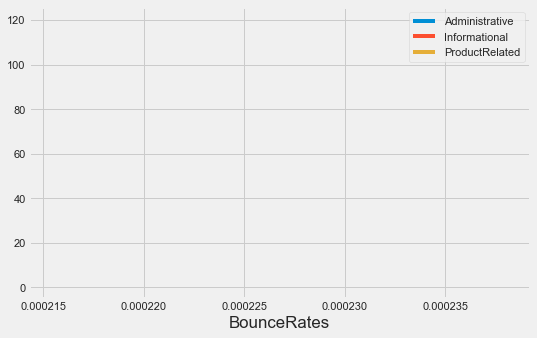

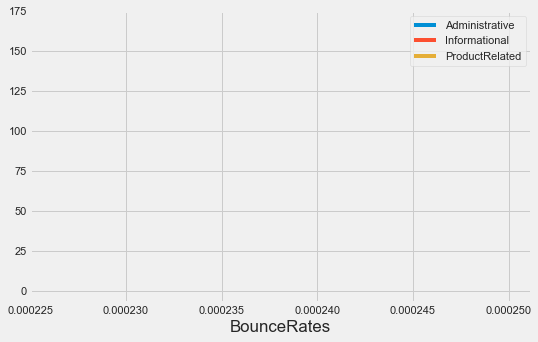

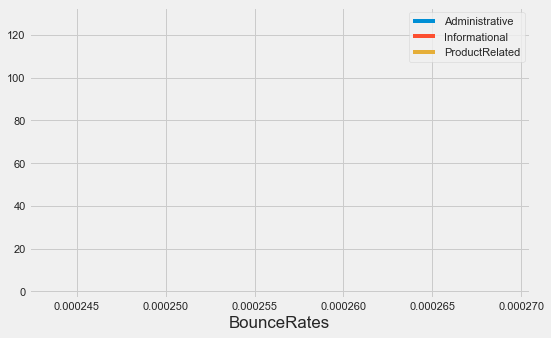

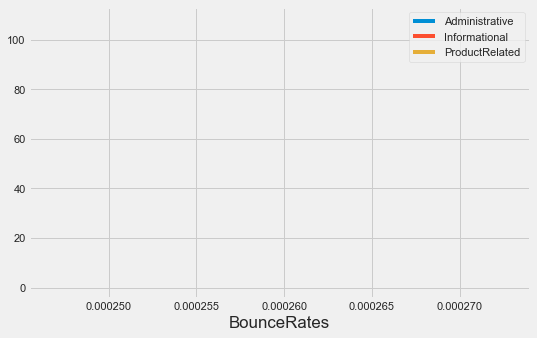

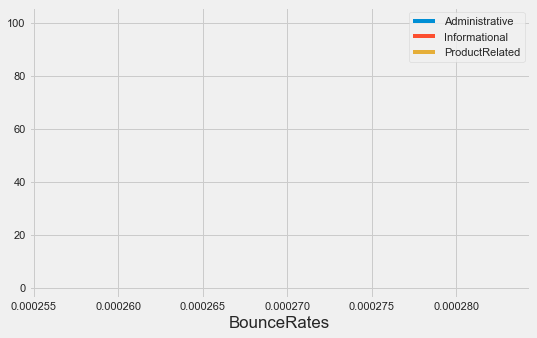

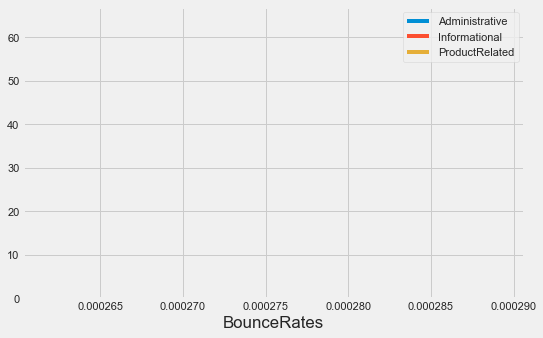

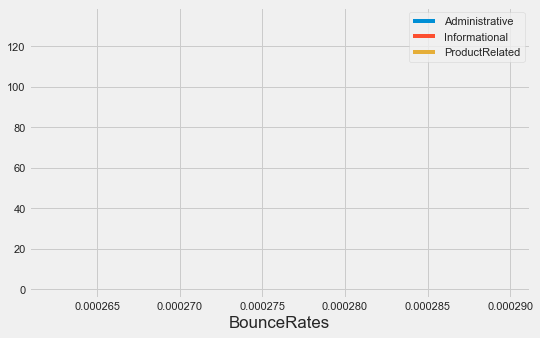

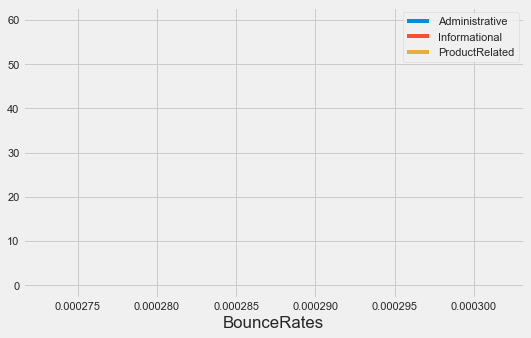

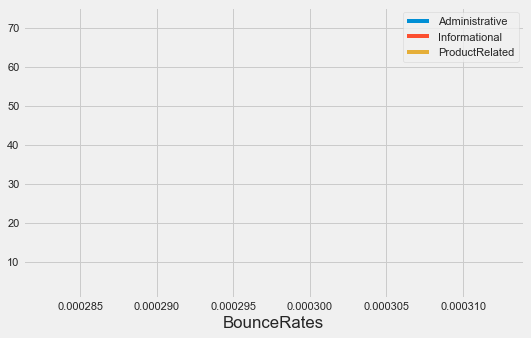

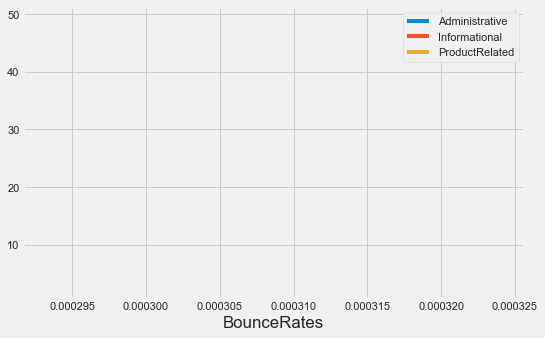

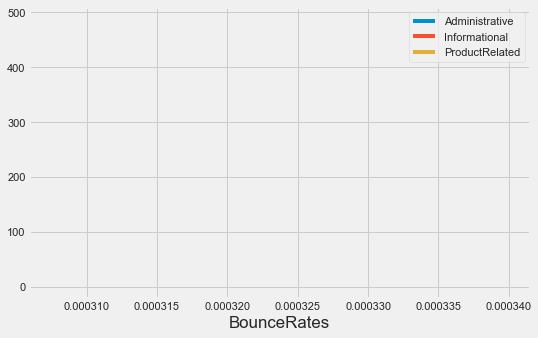

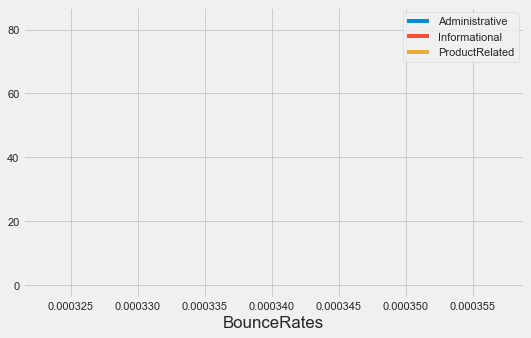

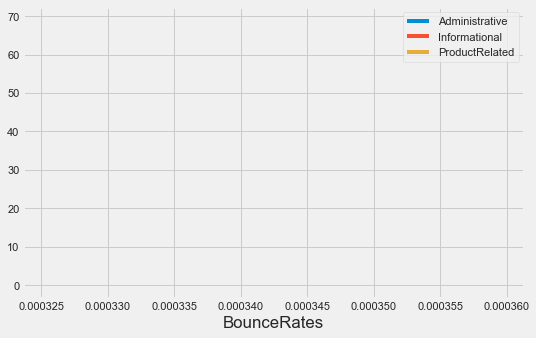

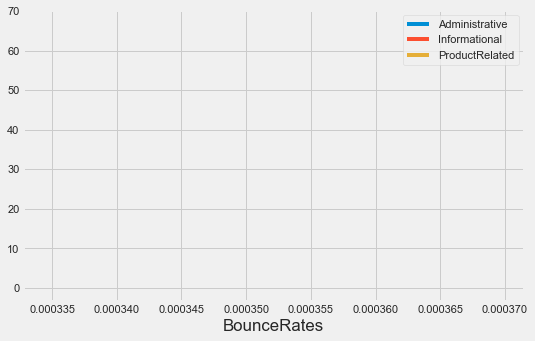

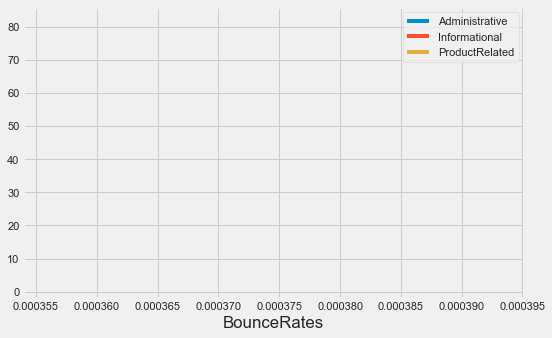

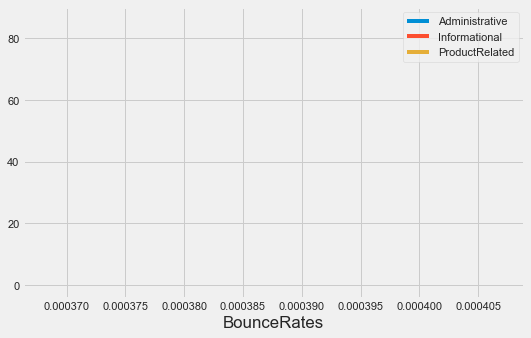

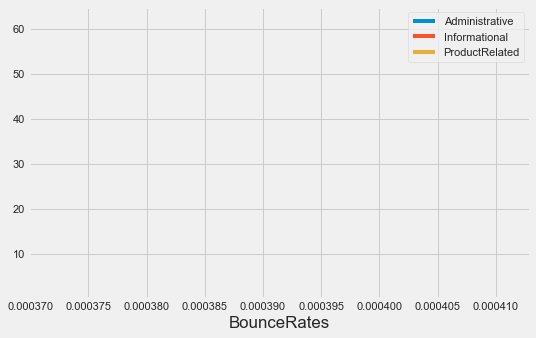

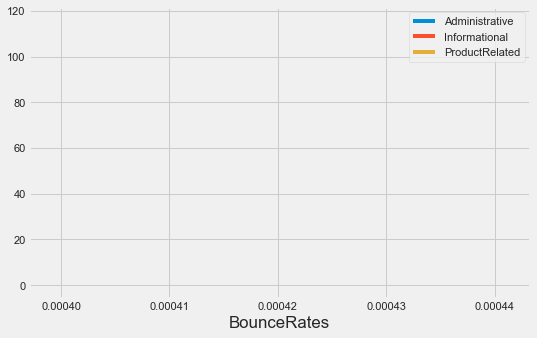

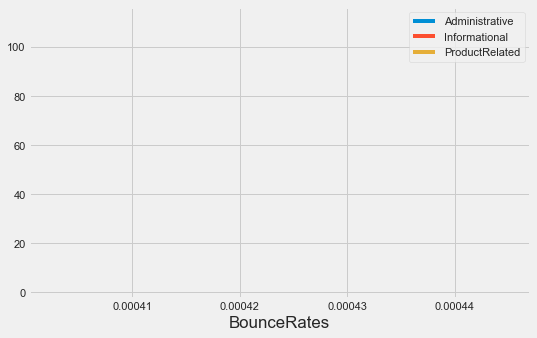

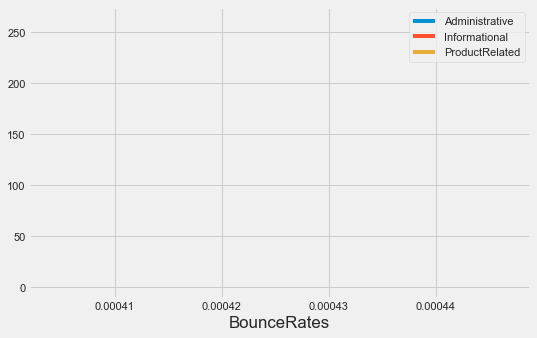

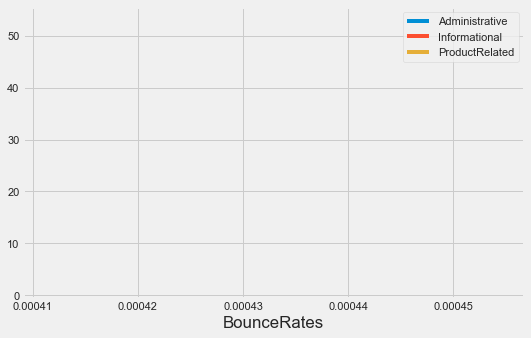

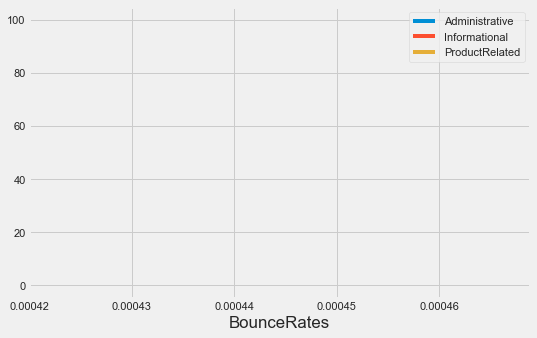

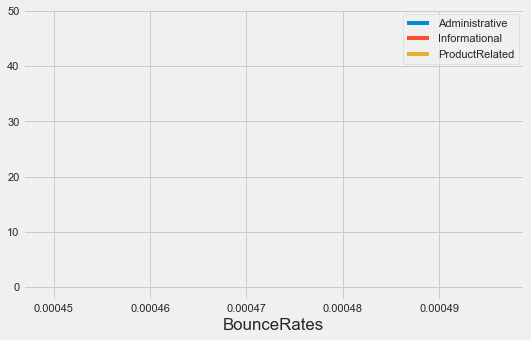

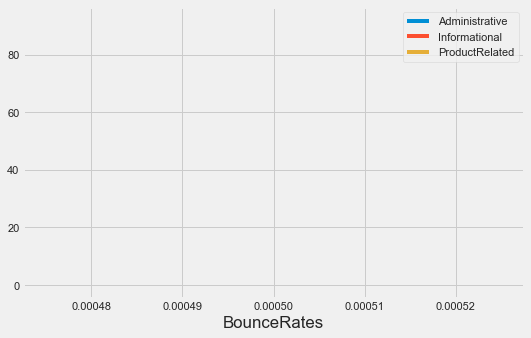

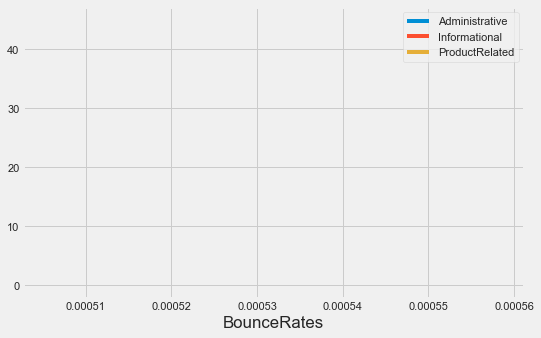

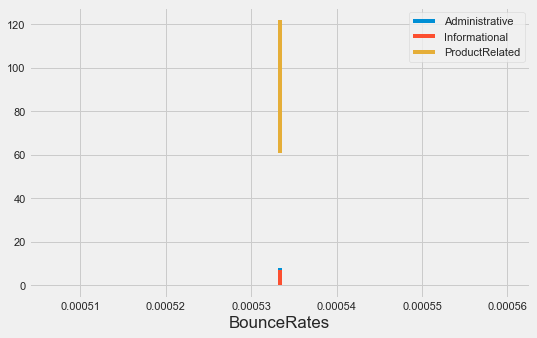

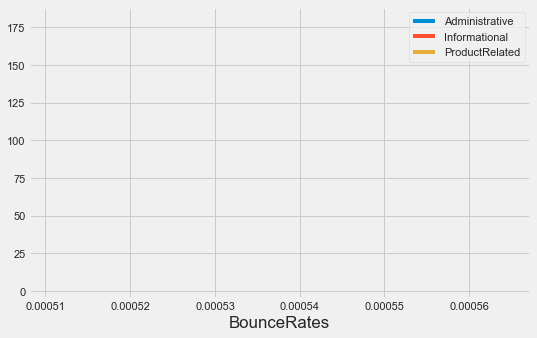

Error in callback <function flush_figures at 0x125ab9c10> (for post_execute):


KeyboardInterrupt: 

In [113]:
df.set_index('BounceRates', inplace=True)
df.groupby('BounceRates')['Administrative','Informational','ProductRelated'].plot(legend=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PageValues', ylabel='Density'>

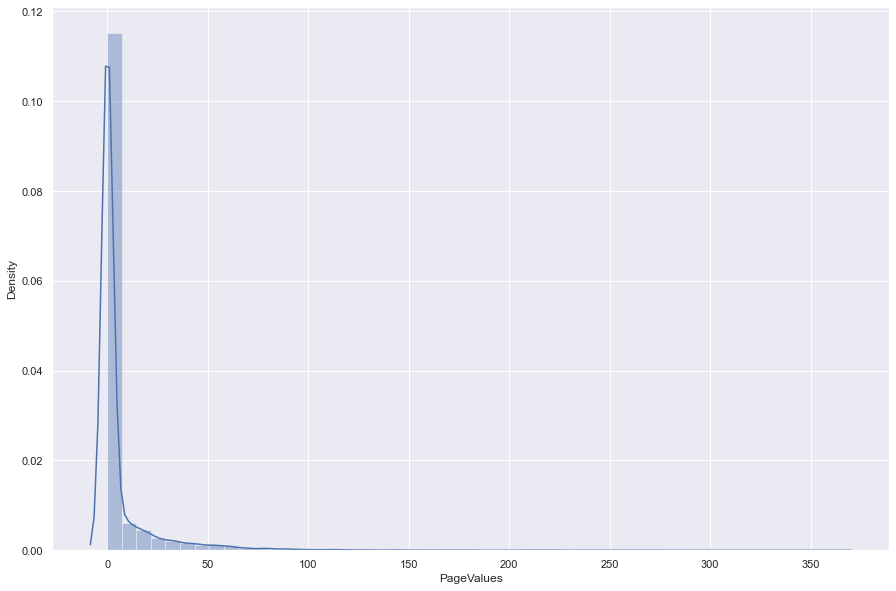

In [41]:
sns.distplot(df.PageValues)

<AxesSubplot:xlabel='PageValues', ylabel='Density'>

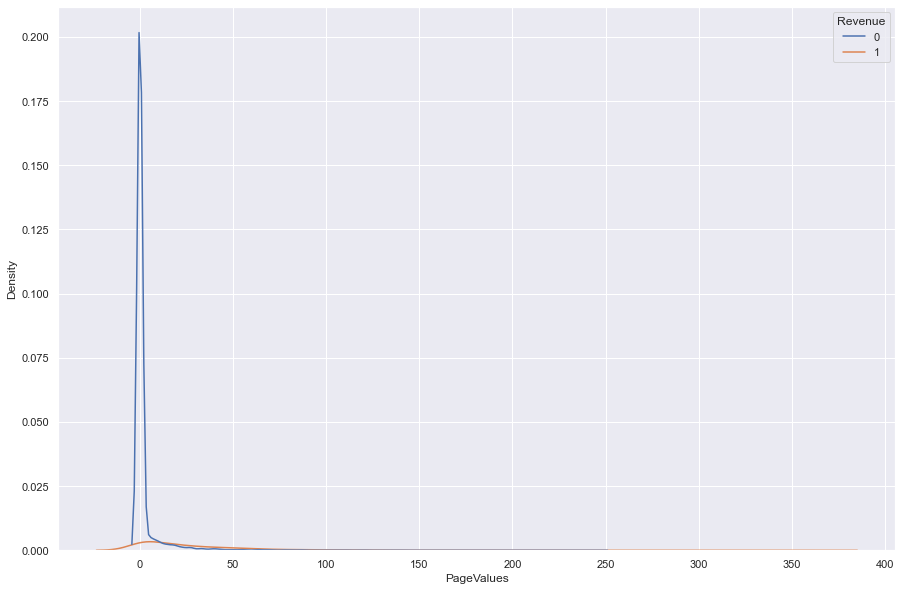

In [42]:
sns.kdeplot(data=df, x="PageValues", hue="Revenue") 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



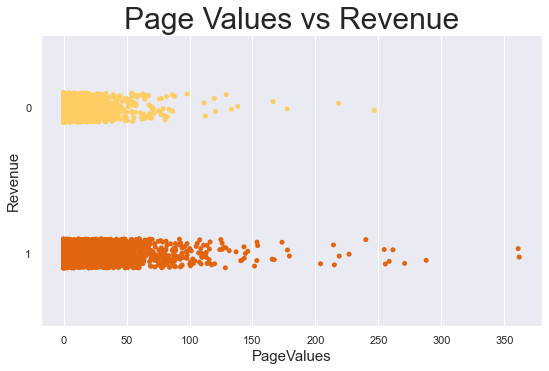

In [93]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['PageValues'], df['Revenue'], palette="YlOrBr", orient = 'h')
plt.title('Page Values vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



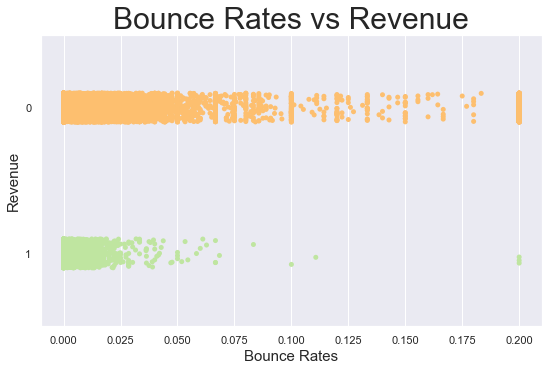

In [94]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(df['BounceRates'], df['Revenue'], palette = 'Spectral', orient = 'h')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Bounce Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


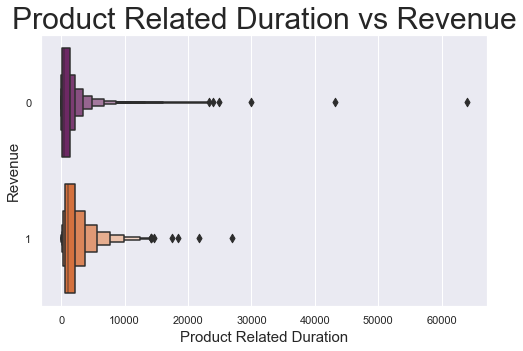

In [45]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(df['ProductRelated_Duration'], df['Revenue'], palette = 'inferno', orient = 'h')
plt.title('Product Related Duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related Duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

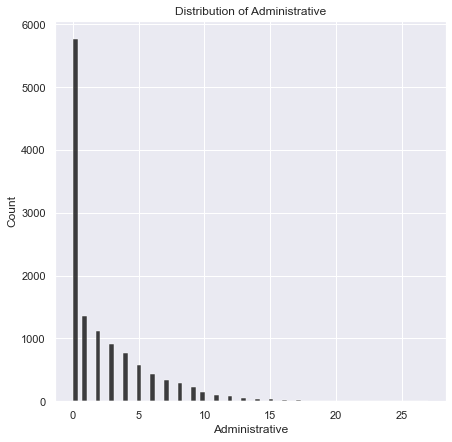

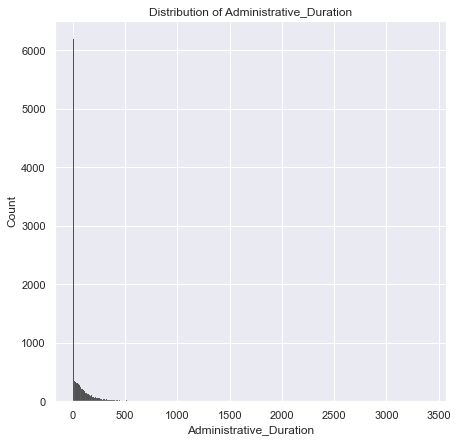

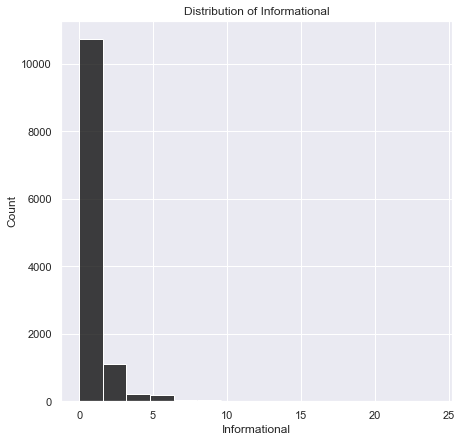

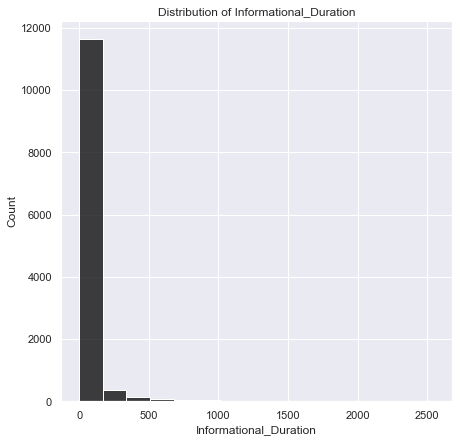

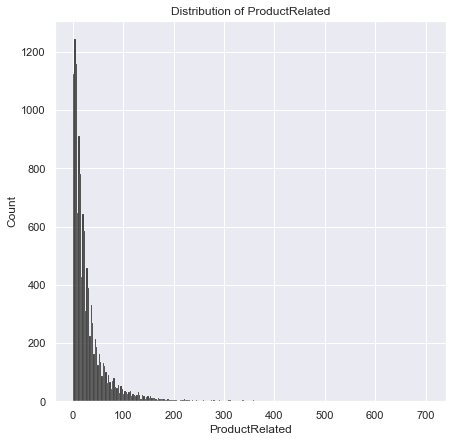

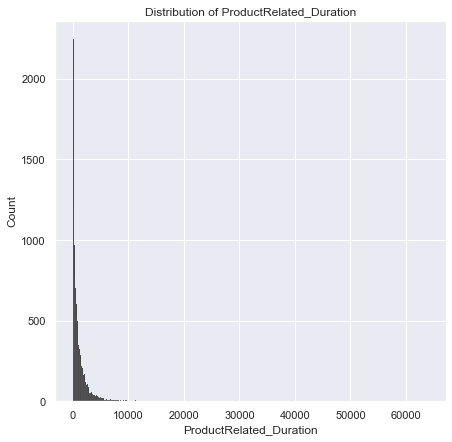

In [49]:
continous_clm = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration' ]
for i in continous_clm:
        plt.figure(figsize=(7,7))
        sns.histplot(df[i], color='black')
        plt.title('Distribution of {}'.format(i))
        plt.show()

In [53]:
df = df.drop(df[df['Administrative_Duration'] < 0].index)
df = df.drop(df[df['Informational_Duration'] < 0].index)
df = df.drop(df[df['ProductRelated_Duration'] < 0].index)
#Checking , no negative values
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay         Month  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427      7.651987   
std        0.048488      0.048597     18.568437      0.198917      3.392841   
min        0.000000      0.000000      0.000000      0.000000      2.000000   
25%        0.000000      0.014286      0.000000      0.000000      5.000000   
50%        0.003112      0.025156      0.000000      0.000000      7.000000   
75%        0.016813      0.050000      0.000000      0.000000     11.000000   
max        0.200000      0.200000    361.763742      1.000000     12.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      12330.000000  12330.000000  12330.000000  12330.000000   
mean           2.124006      2.357097      3.147364      4.069586   
std            0.911325      1.717277      2.401591      4.025169   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      2.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

            Weekend       Revenue  
count  12330.000000  12330.000000  
mean       0.232603      0.154745  
std        0.422509      0.361676  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

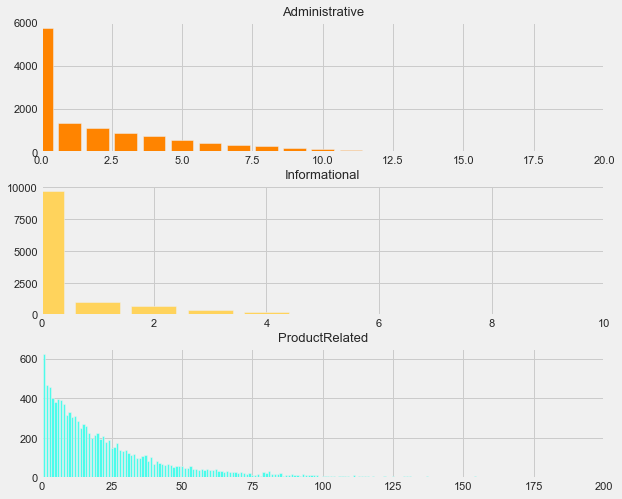

In [103]:
# Countplots on 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(nrows = 3, ncols = 2,figsize = (17,7))
fig.tight_layout()

#fig.suptitle('Countplots Of Some Features')    Main TItle
ax[0,0].bar(df['Administrative'].value_counts().index,df['Administrative'].value_counts().values,color = '#ff8400')
ax[0,0].set_title('Administrative',size=13)
ax[0,0].set_xlim(0,20)

ax[1,0].bar(df['Informational'].value_counts().index,df['Informational'].value_counts().values,color = '#ffd35c')
ax[1,0].set_title('Informational',size=13)
ax[1,0].set_xlim(0,10)

ax[2,0].bar(df['ProductRelated'].value_counts().index,df['ProductRelated'].value_counts().values,color = '#4cfceb')
ax[2,0].set_title('ProductRelated',size=13)
ax[2,0].set_xlim(0,200)


fig.delaxes(ax[0,1])
fig.delaxes(ax[1,1])
fig.delaxes(ax[2,1]) 
 

Text(0.5, 1.0, 'Page Values depending on Availability of Making Revenue')

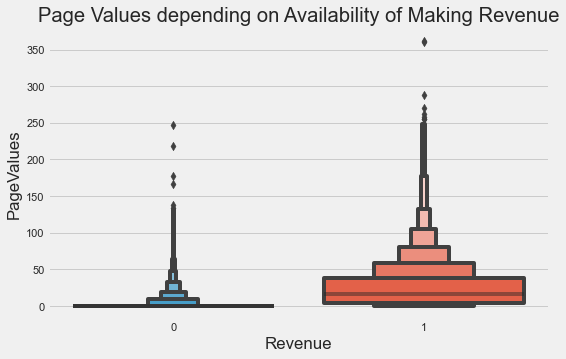

In [76]:
sns.boxenplot(x=df['Revenue'],y=df['PageValues']).set_title('Page Values depending on Availability of Making Revenue')

Text(0.5, 1.0, 'Page Values VS ProductRelated_Duration ')

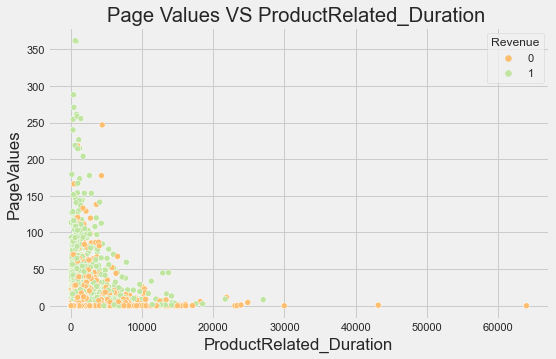

In [106]:
sns.scatterplot(x=df['ProductRelated_Duration'],y=df['PageValues'],hue = df['Revenue'],palette='Spectral').set_title('Page Values VS ProductRelated_Duration ')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'ExitRates VS BounceRates')

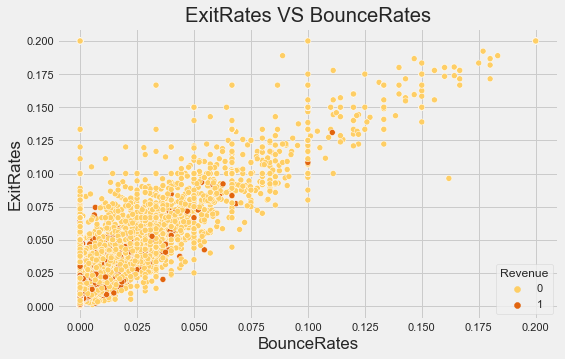

In [107]:
sns.scatterplot(df['BounceRates'],df['ExitRates'],hue = df['Revenue'],palette='YlOrBr').set_title('ExitRates VS BounceRates')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Each Types of Durations Distribution')

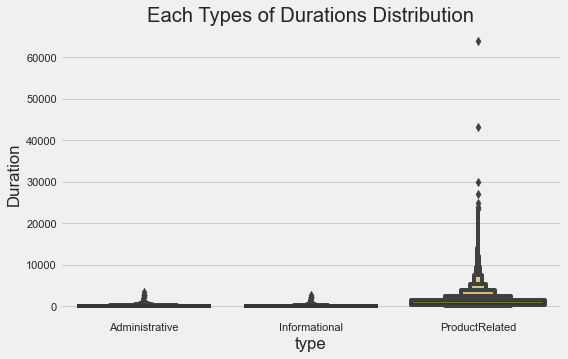

In [78]:
admin_df = pd.DataFrame(df['Administrative_Duration'])
admin_df.rename(columns={'Administrative_Duration' :'Duration'},inplace = True)
admin_df['type'] = admin_df['Duration'].apply(lambda x:'Administrative')

inform_df= pd.DataFrame(df['Informational_Duration'])
inform_df.rename(columns={'Informational_Duration' :'Duration'},inplace =True)
inform_df['type'] = inform_df['Duration'].apply(lambda x:'Informational')

prod_df= pd.DataFrame(df['ProductRelated_Duration'])
prod_df.rename(columns={'ProductRelated_Duration' :'Duration'},inplace =True)
prod_df['type'] = prod_df['Duration'].apply(lambda x:'ProductRelated')



dur_df = pd.concat([admin_df,inform_df,prod_df])
sns.boxenplot(dur_df['type'], dur_df['Duration']).set_title('Each Types of Durations Distribution')

In [79]:
fig = px.box(df, x="Revenue", y="PageValues", color="VisitorType")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [80]:
fig = px.box(df, x="Revenue", y="Informational", color="VisitorType")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [81]:
fig = px.box(df, x="Revenue", y="ProductRelated", color="VisitorType")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

<AxesSubplot:>

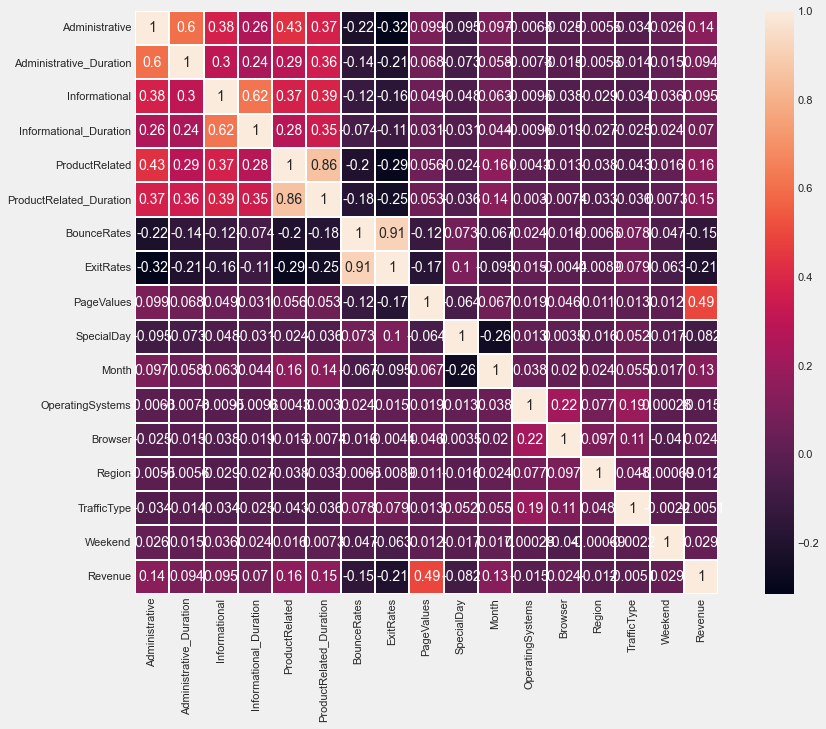

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),
            linewidths=0.1,
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            annot=True)

In [83]:
fig = px.scatter(df, x="ProductRelated_Duration", y="Administrative_Duration", size="PageValues", color="Region",
                 hover_name="Region", log_x=True, size_max=60)
fig.show()

In [84]:
fig = px.bar(df, x="Revenue", y="Region", color='VisitorType', orientation='h',
             hover_data=["PageValues", "Revenue"],
             height=400,
             title='Region')
fig.show()

# Encoding

In [114]:
df['VisitorType'] = df['VisitorType'].map({'Returning_Visitor':2, 'New_Visitor':1, 'Other':0})

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 12330 entries, 0.2 to 0.0
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   ExitRates                12330 non-null  float64
 7   PageValues               12330 non-null  float64
 8   SpecialDay               12330 non-null  float64
 9   Month                    12330 non-null  int64  
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType         

In [116]:
a = df.corr()
b = a[['Revenue']]
b.sort_values(by='Revenue', ascending=False)

Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Month                    0.127372
Informational            0.095200
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.023984
TrafficType             -0.005113
Region                  -0.011595
OperatingSystems        -0.014668
SpecialDay              -0.082305
VisitorType             -0.098485
ExitRates               -0.207071

# Outliners

In [117]:
print('1º Quartile: ', df['ProductRelated_Duration'].quantile(q = 0.25))
print('2º Quartile: ', df['ProductRelated_Duration'].quantile(q = 0.50))
print('3º Quartile: ', df['ProductRelated_Duration'].quantile(q = 0.75))
print('4º Quartile: ', df['ProductRelated_Duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', df['ProductRelated_Duration'].quantile(q = 0.75) + 
                      1.5*(df['ProductRelated_Duration'].quantile(q = 0.75) - df['ProductRelated_Duration'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  184.1375
2º Quartile:  598.9369047499999
3º Quartile:  1464.1572135000001
4º Quartile:  63973.52223
Duration above:  3384.1867837500004 are outliers


In [118]:
print('1º Quartile: ', df['Administrative_Duration'].quantile(q = 0.25))
print('2º Quartile: ', df['Administrative_Duration'].quantile(q = 0.50))
print('3º Quartile: ', df['Administrative_Duration'].quantile(q = 0.75))
print('4º Quartile: ', df['Administrative_Duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', df['Administrative_Duration'].quantile(q = 0.75) + 
                      1.5*(df['Administrative_Duration'].quantile(q = 0.75) - df['Administrative_Duration'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  0.0
2º Quartile:  7.5
3º Quartile:  93.25625
4º Quartile:  3398.75
Duration above:  233.14062499999997 are outliers


In [119]:
print('1º Quartile: ', df['Informational_Duration'].quantile(q = 0.25))
print('2º Quartile: ', df['Informational_Duration'].quantile(q = 0.50))
print('3º Quartile: ', df['Informational_Duration'].quantile(q = 0.75))
print('4º Quartile: ', df['Informational_Duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', df['Informational_Duration'].quantile(q = 0.75) + 
                      1.5*(df['Informational_Duration'].quantile(q = 0.75) - df['Informational_Duration'].quantile(q = 0.25)), 'are outliers')


1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  2549.375
Duration above:  0.0 are outliers


In [120]:
df = df[df.ProductRelated_Duration < 3384.18]
df = df[df.Administrative_Duration < 233.14]

In [121]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    10467.000000             10467.000000   10467.000000   
mean         1.604662                36.259147       0.337346   
std          2.442930                56.192433       0.976302   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                58.033333       0.000000   
max         19.000000               233.083333      16.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            10467.000000    10467.000000             10467.000000   
mean                20.959281       21.961116               741.160616   
std                102.611044       22.490491               771.708313   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        6.000000               144.500000   
50%                  0.000000       15.000000               471.400000   
75%                  0.000000       30.000000              1101.568333   
max               2252.033333      223.000000              3382.287999   

          ExitRates    PageValues    SpecialDay         Month  \
count  10467.000000  10467.000000  10467.000000  10467.000000   
mean       0.046958      5.483737      0.065444      7.492596   
std        0.051411     18.620777      0.204201      3.413004   
min        0.000000      0.000000      0.000000      2.000000   
25%        0.014956      0.000000      0.000000      5.000000   
50%        0.028564      0.000000      0.000000      7.000000   
75%        0.053597      0.000000      0.000000     11.000000   
max        0.200000    361.763742      1.000000     12.000000   

       OperatingSystems       Browser        Region   TrafficType  \
count      10467.000000  10467.000000  10467.000000  10467.000000   
mean           2.124391      2.364192      3.159645      4.114550   
std            0.931437      1.739803      2.404734      4.049848   
min            1.000000      1.000000      1.000000      1.000000   
25%            2.000000      2.000000      1.000000      2.000000   
50%            2.000000      2.000000      3.000000      3.000000   
75%            3.000000      2.000000      4.000000      4.000000   
max            8.000000     13.000000      9.000000     20.000000   

        VisitorType       Weekend       Revenue  
count  10467.000000  10467.000000  10467.000000  
mean       1.839400      0.230439      0.135664  
std        0.387191      0.421134      0.342448  
min        0.000000      0.000000      0.000000  
25%        2.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000  
75%        2.000000      0.000000      0.000000  
max        2.000000      1.000000      1.000000

# train_test_split

In [122]:
X = df.drop(columns='Revenue', axis=1)
y = df['Revenue']

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (8373, 16)
Input Test: (2094, 16)
Output Training: (8373,)
Output Test: (2094,)


# Feature Importance

In [132]:
import xgboost
fi = xgboost.XGBClassifier()
fi.fit(X,y)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:53:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
data = list(zip(X.columns, fi.feature_importances_))
feature_importance = pd.DataFrame(data, columns =['Feature', 'Importance'])

In [134]:
pd.set_option('display.max_rows', 20)
feature_importance.sort_values(by='Importance', ascending=False)

Feature  Importance
7                PageValues    0.379640
9                     Month    0.096466
14              VisitorType    0.083205
4            ProductRelated    0.041914
0            Administrative    0.041613
6                 ExitRates    0.041224
1   Administrative_Duration    0.038376
2             Informational    0.035825
5   ProductRelated_Duration    0.035542
13              TrafficType    0.033738
15                  Weekend    0.032702
3    Informational_Duration    0.032147
11                  Browser    0.031302
10         OperatingSystems    0.026708
12                   Region    0.026040
8                SpecialDay    0.023561

# PCA

In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [136]:
explained_variance = pca.explained_variance_ratio_

In [137]:
explained_variance

array([9.76892061e-01, 1.72962521e-02, 4.86249641e-03, 5.49929938e-04])

In [138]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

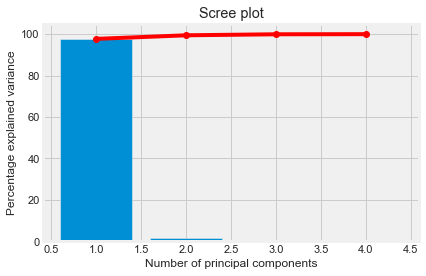

In [139]:
display_scree_plot(pca)

# Modelling

In [140]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [141]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [142]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8849092645654251
Precision: 0.5642857142857143
Recall: 0.5703971119133574
F1 Score: 0.5673249551166967
Cohens Kappa Score: 0.5009542758480199
Area Under Curve: 0.7516267342725841
Confusion Matrix:
 [[1695  122]
 [ 119  158]]


In [143]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [144]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9207258834765998
Precision: 0.7361702127659574
Recall: 0.6245487364620939
F1 Score: 0.6757812500000001
Cohens Kappa Score: 0.6309693419312099
Area Under Curve: 0.9321967220931873
Confusion Matrix:
 [[1755   62]
 [ 104  173]]


In [145]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [146]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8672397325692455
Precision: 0.49842271293375395
Recall: 0.5703971119133574
F1 Score: 0.5319865319865319
Cohens Kappa Score: 0.4550438206433518
Area Under Curve: 0.8472757292239956
Confusion Matrix:
 [[1658  159]
 [ 119  158]]


In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [148]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.9092645654250239
Precision: 0.7770700636942676
Recall: 0.4404332129963899
F1 Score: 0.5622119815668202
Cohens Kappa Score: 0.5158782114774805
Area Under Curve: 0.8407598513040697
Confusion Matrix:
 [[1782   35]
 [ 155  122]]


In [149]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:57:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.9192932187201528
Precision: 0.7327586206896551
Recall: 0.6137184115523465
F1 Score: 0.6679764243614931
Cohens Kappa Score: 0.6224483046308723
Area Under Curve: 0.9322424196666462
Confusion Matrix:
 [[1755   62]
 [ 107  170]]


In [151]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [152]:
# Evaluate Model
ada_eval = evaluate_model(ada, X_test, y_test)

# Print result
print('Accuracy:', ada_eval['acc'])
print('Precision:', ada_eval['prec'])
print('Recall:', ada_eval['rec'])
print('F1 Score:', ada_eval['f1'])
print('Cohens Kappa Score:', ada_eval['kappa'])
print('Area Under Curve:', ada_eval['auc'])
print('Confusion Matrix:\n', ada_eval['cm'])

Accuracy: 0.9121298949379179
Precision: 0.6978723404255319
Recall: 0.592057761732852
F1 Score: 0.640625
Cohens Kappa Score: 0.5909539693695338
Area Under Curve: 0.923314504608501
Confusion Matrix:
 [[1746   71]
 [ 113  164]]


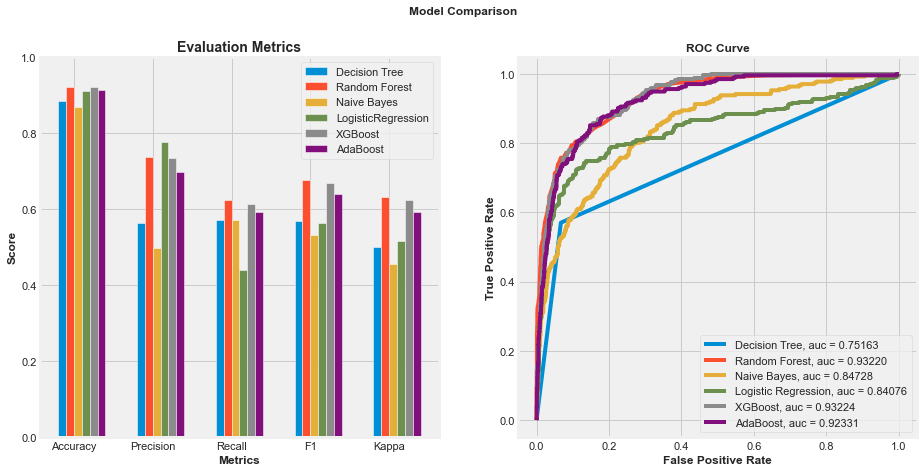

In [153]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=12, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]
ada_score = [ada_eval['acc'], ada_eval['prec'], ada_eval['rec'], ada_eval['f1'], ada_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, lr_score, width=barWidth, edgecolor='white', label='LogisticRegression')
ax1.bar(r5, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')
ax1.bar(r6, ada_score, width=barWidth, edgecolor='white', label='AdaBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBoost, auc = {:0.5f}'.format(xgb_eval['auc']))
ax2.plot(ada_eval['fpr'], ada_eval['tpr'], label='AdaBoost, auc = {:0.5f}'.format(ada_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Decision Tree  
 Accuracy: 0.8849092645654251 
 F-score 0.5673249551166967
Random Forest  
 Accuracy: 0.9207258834765998 
 F-score 0.6757812500000001
Naive Bayes  
 Accuracy: 0.8672397325692455 
 F-score 0.5319865319865319
Logistic Regression  
 Accuracy: 0.9092645654250239 
 F-score 0.5622119815668202
[08:58:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBoost  
 Accuracy: 0.9192932187201528 
 F-score 0.6679764243614931
AdaBoost  
 Accuracy: 0.9121298949379179 
 F-score 0.640625


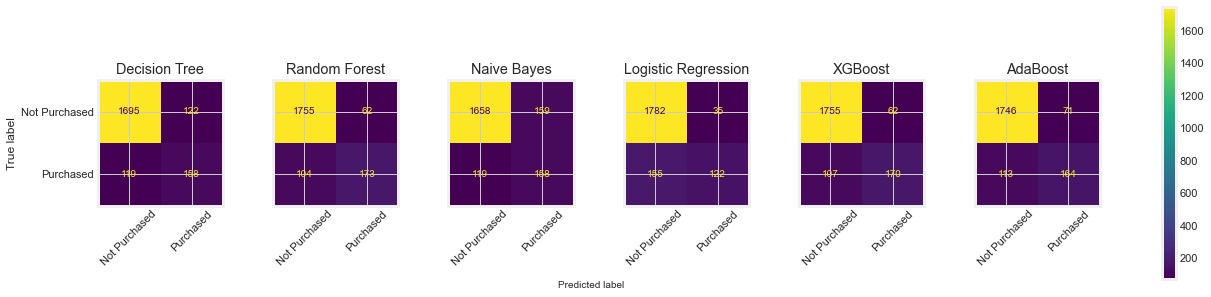

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
classifiers = {
    "Decision Tree": tree.DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgboost.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=0),
    }

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, " \n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [158]:
from imblearn.combine import SMOTEENN

In [159]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [160]:
X_train, X_test, y_train, y_test=train_test_split(X_resampled1, y_resampled1,train_size=0.8,random_state=1)

In [161]:
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [162]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9574750830564784
Precision: 0.9588128407026045
Recall: 0.963481436396835
F1 Score: 0.9611414693381907
Cohens Kappa Score: 0.9141868351807249
Area Under Curve: 0.956868735755111
Confusion Matrix:
 [[1299   68]
 [  60 1583]]


In [163]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [164]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.9747508305647841
Precision: 0.9780353874313605
Recall: 0.9756542909312234
F1 Score: 0.9768433881779403
Cohens Kappa Score: 0.9490859916146347
Area Under Curve: 0.9960119876348019
Confusion Matrix:
 [[1331   36]
 [  40 1603]]


In [165]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [166]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8833887043189369
Precision: 0.8854415274463007
Recall: 0.9032258064516129
F1 Score: 0.8942452545947575
Cohens Kappa Score: 0.7643220145023684
Area Under Curve: 0.9566572468778677
Confusion Matrix:
 [[1175  192]
 [ 159 1484]]


In [167]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [168]:
# Evaluate Model
lr_eval = evaluate_model(lr, X_test, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.9182724252491694
Precision: 0.9761417859577369
Recall: 0.8715763846622033
F1 Score: 0.9209003215434084
Cohens Kappa Score: 0.8369224087542049
Area Under Curve: 0.9693532581085949
Confusion Matrix:
 [[1332   35]
 [ 211 1432]]


In [169]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[09:02:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.9754152823920266
Precision: 0.9768996960486322
Recall: 0.9780888618381011
F1 Score: 0.9774939172749392
Cohens Kappa Score: 0.9504075557564329
Area Under Curve: 0.9964167105598845
Confusion Matrix:
 [[1329   38]
 [  36 1607]]


In [171]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [172]:
# Evaluate Model
ada_eval = evaluate_model(ada, X_test, y_test)

# Print result
print('Accuracy:', ada_eval['acc'])
print('Precision:', ada_eval['prec'])
print('Recall:', ada_eval['rec'])
print('F1 Score:', ada_eval['f1'])
print('Cohens Kappa Score:', ada_eval['kappa'])
print('Area Under Curve:', ada_eval['auc'])
print('Confusion Matrix:\n', ada_eval['cm'])

Accuracy: 0.9561461794019933
Precision: 0.9695463020509634
Recall: 0.9494826536822885
F1 Score: 0.959409594095941
Cohens Kappa Score: 0.9117330682866858
Area Under Curve: 0.9896268045010175
Confusion Matrix:
 [[1318   49]
 [  83 1560]]


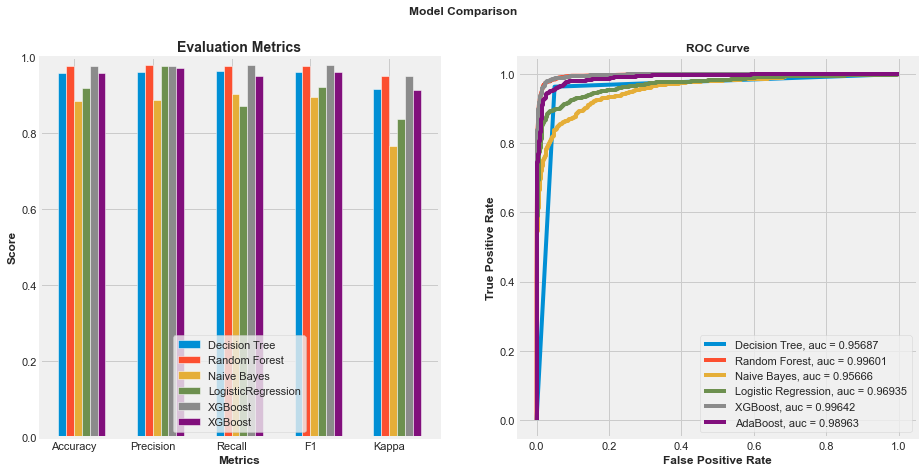

In [173]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=12, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]
ada_score = [ada_eval['acc'], ada_eval['prec'], ada_eval['rec'], ada_eval['f1'], ada_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, lr_score, width=barWidth, edgecolor='white', label='LogisticRegression')
ax1.bar(r5, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')
ax1.bar(r6, ada_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBoost, auc = {:0.5f}'.format(xgb_eval['auc']))
ax2.plot(ada_eval['fpr'], ada_eval['tpr'], label='AdaBoost, auc = {:0.5f}'.format(ada_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax2.legend(loc=4)

plt.show()

Decision Tree  
 Accuracy: 0.9574750830564784 
 F-score 0.9611414693381907
Random Forest  
 Accuracy: 0.9747508305647841 
 F-score 0.9768433881779403
Naive Bayes  
 Accuracy: 0.8833887043189369 
 F-score 0.8942452545947575
Logistic Regression  
 Accuracy: 0.9182724252491694 
 F-score 0.9209003215434084
[09:03:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBoost  
 Accuracy: 0.9754152823920266 
 F-score 0.9774939172749392
AdaBoost  
 Accuracy: 0.9561461794019933 
 F-score 0.959409594095941


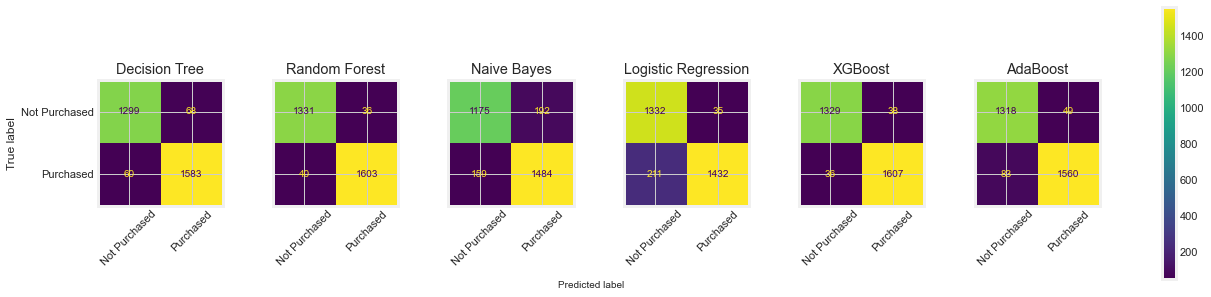

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
classifiers = {
    "Decision Tree": tree.DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "XGBoost": xgboost.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=0),
    }

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, " \n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

# Hypertuning

In [175]:
from sklearn.model_selection import RandomizedSearchCV

classifier_smote_hpo=xgboost.XGBClassifier()

In [176]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [177]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 9, 10, 12, 15],
 "min_child_weight" : [ 1, 2, 3, 4, 5, 6, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.6, 0.7 ]
    
}


In [178]:
random_search=RandomizedSearchCV(classifier_smote_hpo,param_distributions=params,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=40,verbose=3)

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_resampled1, y_resampled1)
timer(start_time) # timing ends here for "start_time" variable

Fitting 40 folds for each of 5 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of 

[09:06:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 1 minutes and 39.0 seconds.


In [179]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [180]:
random_search.best_params_

{'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 7/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.996 total time=   2.1s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 19/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.998 total time=   2.4s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.995 total time=   2.2s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 24/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.985 total time=   2.4s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 8/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.996 total time=   2.1s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 18/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.993 total time=   2.3s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 9/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=1.000 total time=   2.1s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 14/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.999 total time=   2.4s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.996 total time=   2.1s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 16/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.996 total time=   2.4s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:

[09:04:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 11/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.999 total time=   2.1s
[09:04:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 22/40] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3;, score=0.992 total time=   2.4s
[09:04:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc

In [181]:
classifier=xgboost.XGBClassifier(colsample_bytree = 0.5, gamma = 0.1, learning_rate = 0.25, 
                                 max_depth = 12, min_child_weight = 7)

In [182]:
classifier = classifier.fit(X_train, y_train)

[09:11:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [183]:
y_pred_new = classifier.predict(X_test)

In [184]:
result = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_new)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred_new)
print("Accuracy:",result2)

Confusion Matrix:
[[1319   48]
 [  43 1600]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1367
           1       0.97      0.97      0.97      1643

    accuracy                           0.97      3010
   macro avg       0.97      0.97      0.97      3010
weighted avg       0.97      0.97      0.97      3010

Accuracy: 0.9697674418604652


# Prediction

In [185]:
print(X_test[0:5])

       Administrative  Administrative_Duration  Informational  \
10536               7               138.517362              4   
4318                0                 0.000000              0   
7146                0                 0.000000              0   
3497                0                 0.000000              0   
1537                6               153.275000              3   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
10536              234.229516              40              1797.225078   
4318                 0.000000              63              2593.808333   
7146                 0.000000               8               335.000000   
3497                 0.000000               1                68.000000   
1537               394.000000              25               599.100000   

       ExitRates  PageValues  SpecialDay  Month  OperatingSystems  Browser  \
10536   0.007724   27.521392         0.0      7                 1        2   
4318    

In [186]:
print(y_pred_new[0:10])

[1 0 1 0 1 0 1 0 1 1]


In [187]:
print(y_test[0:10])

10536    1
4318     0
7146     1
3497     0
1537     0
2932     0
12524    1
4382     0
12389    1
13275    1
Name: Revenue, dtype: int64
